# Importing the libraries

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras.layers import BatchNormalization, Dense, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks

import warnings
warnings.simplefilter(action='ignore')

In [59]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [60]:
data.info() ## make sure there are no non null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Always nice to see that there are no null values because it makes the cleaning and preprocessing slightly easier.

In [61]:
data.describe().T ## transposed to make it easier to read

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


There are a lot of skews in the data, with quite a few outliers

# Data Analysis

[Text(0, 0, '203')]

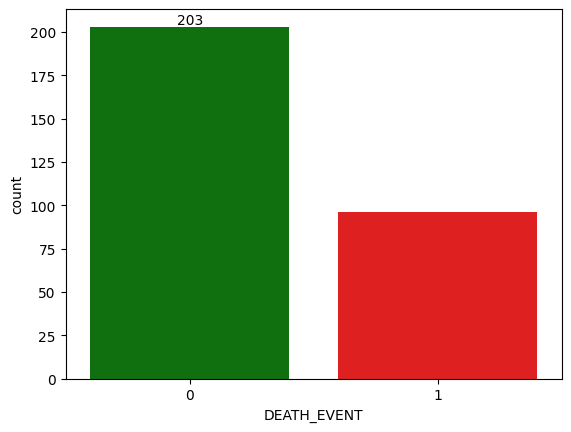

In [62]:
colours = ['green', 'red']
lilgraph = sns.countplot(x = data['DEATH_EVENT'], palette = colours)
lilgraph.bar_label(lilgraph.containers[0])

203 survivals and therefore 96 deaths

ValueError: num must be an integer with 1 <= num <= 12, not 13

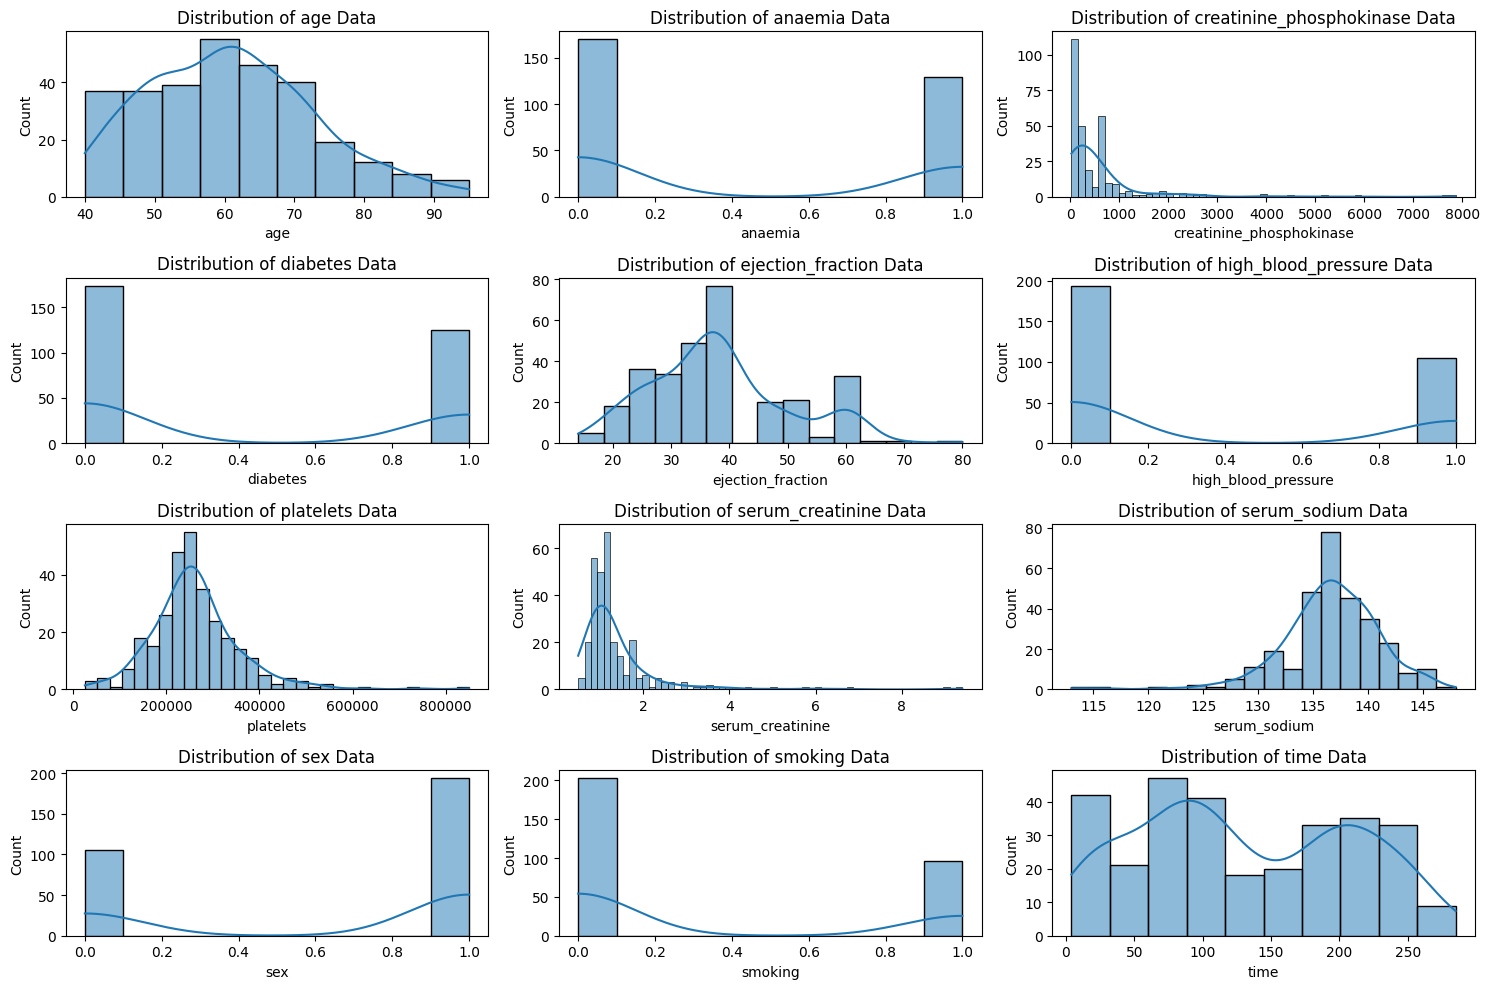

In [63]:
plt.figure(figsize=(15,10)) ## not entirely sure what the error is for but my desired graphs were produced?
for i,col in enumerate(data.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data[col],kde=True)
    plt.tight_layout()
    plt.plot()

We can see the ages are fairly skewed, as are some of the other columns from the dataset.

<Axes: xlabel='age', ylabel='count'>

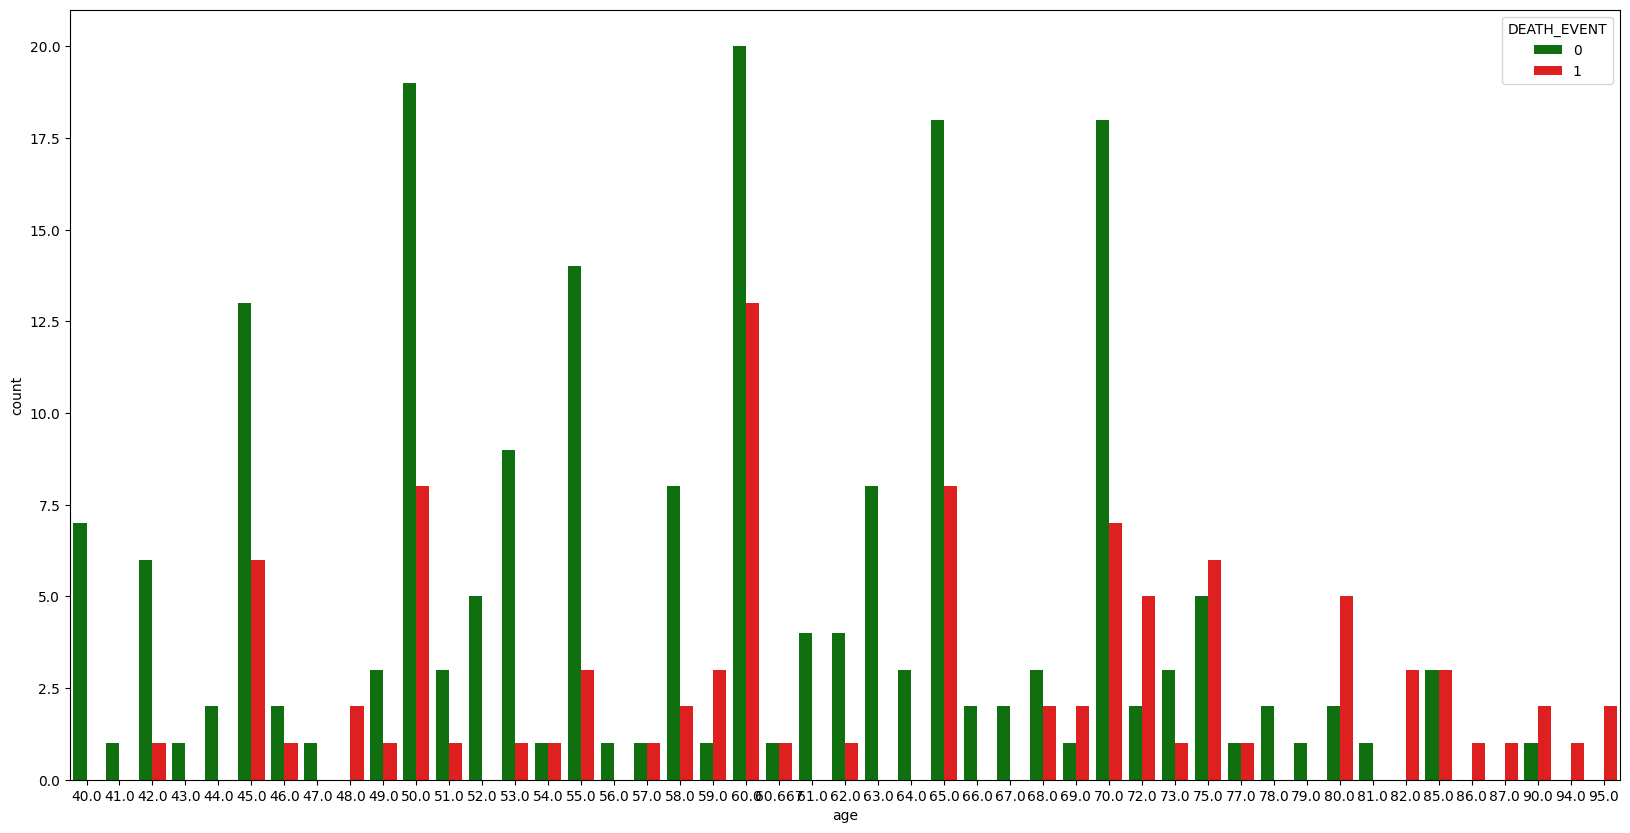

In [64]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['age'], data=data, hue='DEATH_EVENT', palette = colours)

The younger patients have a higher survival rate, and the opposite goes for the older patients.

<Axes: >

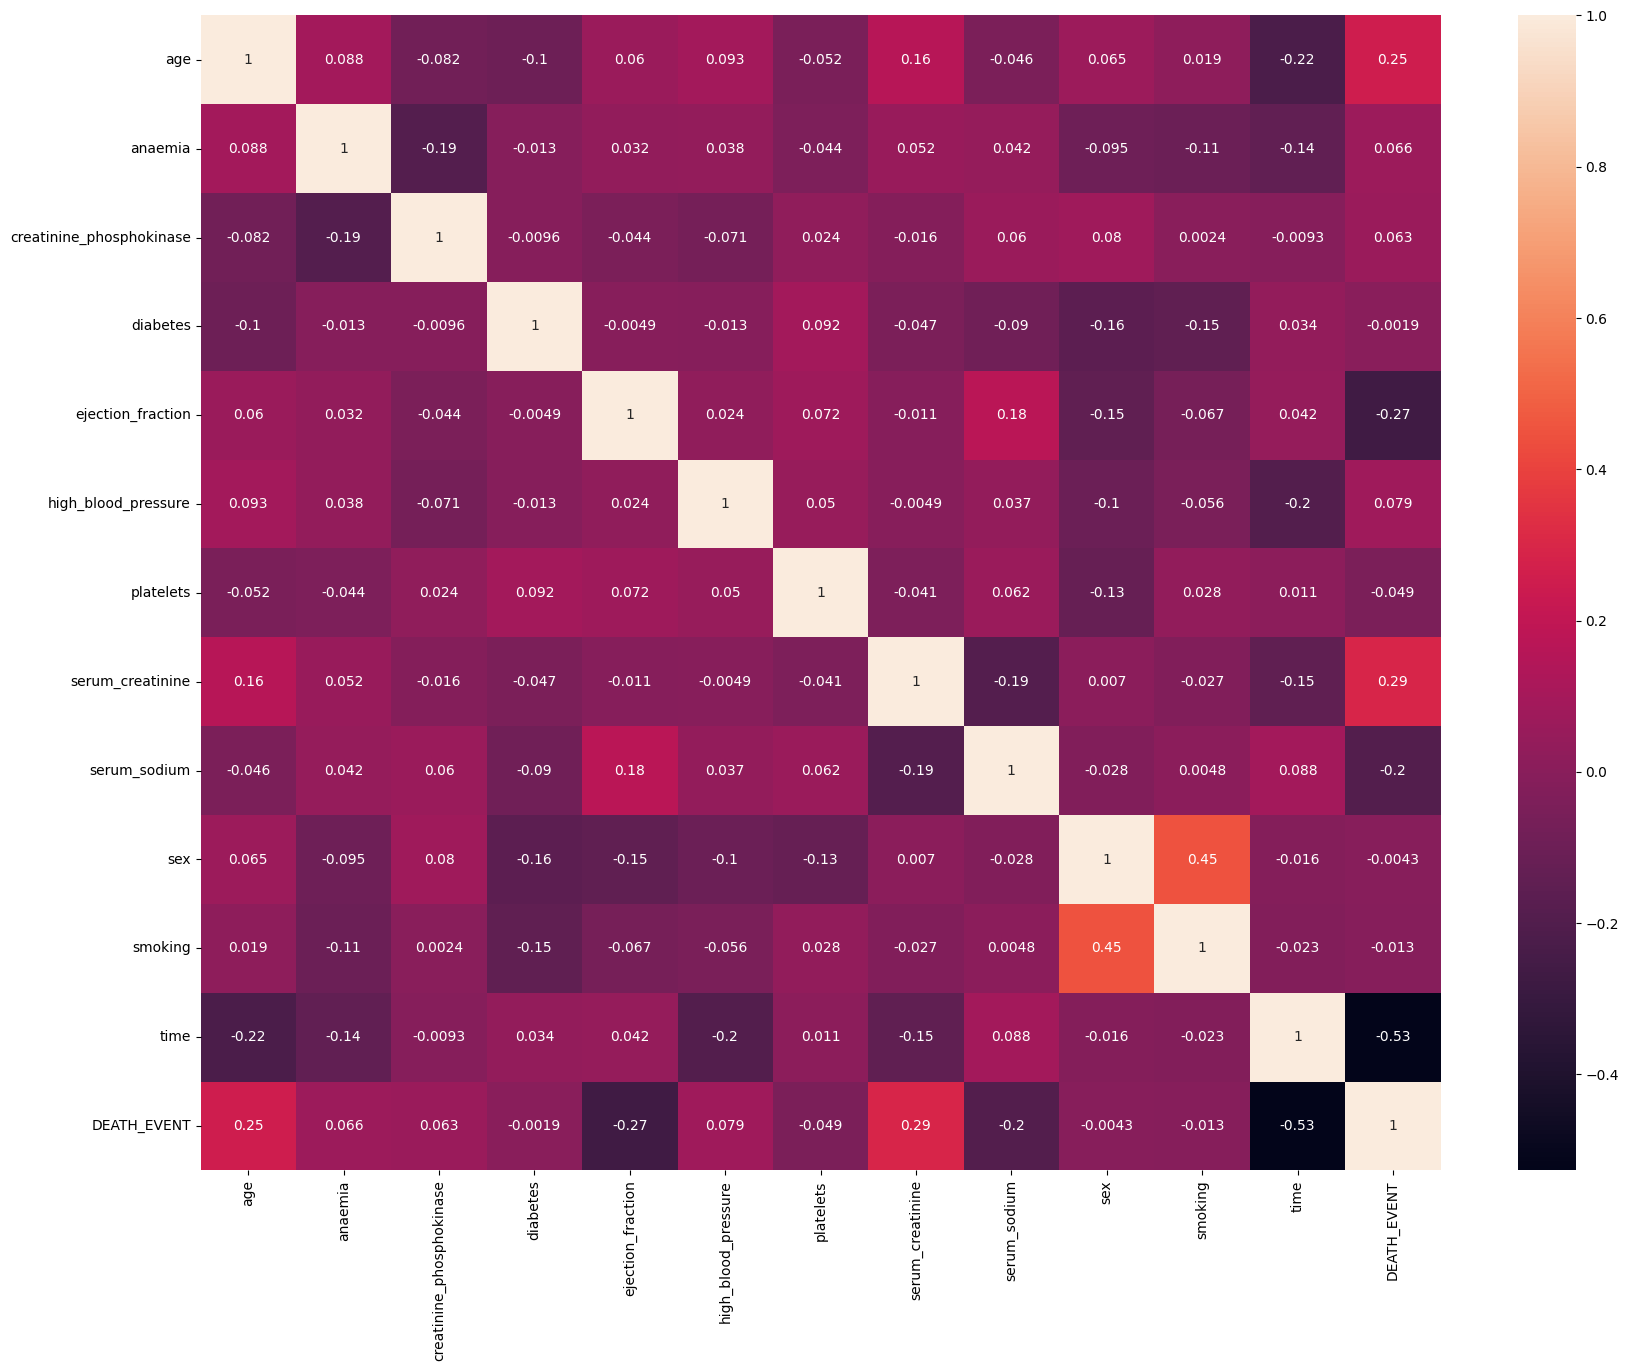

In [65]:
corrmat = data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrmat, annot=True)

Time is the most heavily related to survival. This makes sense because the earlier the follow ups are, the more likely any anomalies would be detected and ultimately, the better the chances of survival are. 

# Data Preprocessing

In [66]:
x = data.drop(['DEATH_EVENT'], axis=1)
y = data['DEATH_EVENT']

In [67]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=32)

# Models

### Artificial Neural Networks

In [69]:
ann = Sequential() ## initialising

# layers
ann.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
ann.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dropout(0.25))
ann.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dropout(0.5))
ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [70]:
ann.fit(x_train, y_train, batch_size = 8, epochs = 100)

Epoch 1/100
27/27 [==============================] - 2s 5ms/step - loss: 0.6912 - accuracy: 0.6651
Epoch 2/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6873 - accuracy: 0.6794
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6838 - accuracy: 0.6794
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.6794
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6637 - accuracy: 0.6794
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6291 - accuracy: 0.6794
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.5725 - accuracy: 0.6794
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.5272 - accuracy: 0.6794
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.4900 - accuracy: 0.7033
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: 0.4926 - accuracy: 0.7656
Epoch 11/

In [71]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.4)

3/3 [==============================] - 0s 3ms/step


In [85]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[53,  8],
       [10, 19]], dtype=int64)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        61
           1       0.70      0.66      0.68        29

    accuracy                           0.80        90
   macro avg       0.77      0.76      0.77        90
weighted avg       0.80      0.80      0.80        90



In [86]:
accuracy = (conf_mat[0][0]+conf_mat[1][1])/(conf_mat[0][1] + conf_mat[1][0] +conf_mat[0][0] +conf_mat[1][1])*100 
print(accuracy) 

80.0


### SVM

In [75]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred1 = svm_model.predict(x_test)
svm_model.score(x_test, y_test)

0.7555555555555555

In [76]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        61
           1       0.65      0.52      0.58        29

    accuracy                           0.76        90
   macro avg       0.72      0.69      0.70        90
weighted avg       0.75      0.76      0.75        90



In [77]:
conf_mat = confusion_matrix(y_test, y_pred1)
conf_mat

array([[53,  8],
       [14, 15]], dtype=int64)

In [78]:
accuracy1 = (conf_mat[0][0]+conf_mat[1][1])/(conf_mat[0][1] + conf_mat[1][0] +conf_mat[0][0] +conf_mat[1][1])*100 
print(accuracy1)

75.55555555555556


Strangely I seem to have gotten identical results from both my SVM and my ANN. I will try a coup,e other models so I can make a more worthwhile comparison.

### Logistic Regression

In [79]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred2 = logreg.predict(x_test)
acc_logreg = accuracy_score(y_test, y_pred2)*100
print('Accuracy: ', acc_logreg)

Accuracy:  82.22222222222221


In [80]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        61
           1       0.78      0.62      0.69        29

    accuracy                           0.82        90
   macro avg       0.81      0.77      0.78        90
weighted avg       0.82      0.82      0.82        90



### Decision Tree

In [81]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)  
y_pred_dt = decision_tree.predict(x_test)  
acc_decision_tree = decision_tree.score(x_train, y_train) * 100

print('Accuracy of Decision Tree: ', acc_decision_tree)

Accuracy of Decision Tree:  100.0


In [89]:
decision_tree3 = DecisionTreeClassifier(max_depth=3) 
decision_tree3.fit(x_train, y_train)  
y_pred_dt3 = decision_tree3.predict(x_test)  
acc_decision_tree3 = decision_tree3.score(x_train, y_train) * 100

print('Accuracy of Decision Tree: ', acc_decision_tree3)

Accuracy of Decision Tree:  88.03827751196172


### k-Nearest Neighbours

In [82]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(x_train, y_train)  
y_pred_knn = knn.predict(x_test)  
acc_knn = knn.score(x_train, y_train) * 100

print('Accuracy of K Nearest Neighbor: ', acc_knn)

Accuracy of K Nearest Neighbor:  84.688995215311


### Gaussian Naive Bayes

In [93]:
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)  
y_pred_gnb = gaussian.predict(x_test)  
acc_gaussian = gaussian.score(x_train, y_train) * 100

print('The accuracy score of Naive Bayes: ', acc_gaussian)

The accuracy score of Naive Bayes:  78.4688995215311


### Time for comparisons

In [94]:
final_scores = {
    'methods': ['Logistic Regression', 'Artificial NN', 'k-Nearest Neighbor','Decision Tree', 'Decision Tree (3)', 'SVM', 'Gaussian NB'],
    'scores': [acc_logreg, accuracy, acc_knn, acc_decision_tree, acc_decision_tree3, accuracy1, acc_gaussian]
}

final_scores1 = {
    'methods': ['LReg', 'ANN', 'kNN','D. T.', 'DT3', 'SVM', 'NB'],
    'scores': [acc_logreg, accuracy, acc_knn, acc_decision_tree, acc_decision_tree3, accuracy1, acc_gaussian]
}

df1 = pd.DataFrame(final_scores1)

df = pd.DataFrame(final_scores)
df

,methods,scores
0,Logistic Regression,82.222222
1,Artificial NN,80.000000
2,k-Nearest Neighbor,84.688995
3,Decision Tree,100.000000
4,Decision Tree (3),88.038278
5,SVM,75.555556
6,Gaussian NB,78.468900


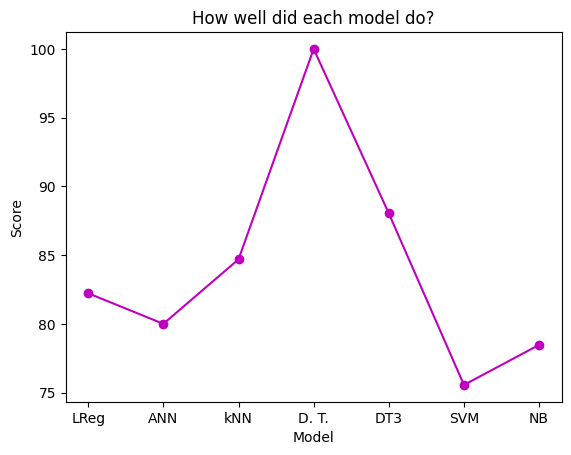

In [95]:
plt.plot(df1['methods'], df1['scores'], 'o-m')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('How well did each model do?')
plt.show()

## Evaluation

It seems Decision Tree was the strongest with an accuracy of 100%, but I'd have to take that with a pinch of salt. The dataset was very small and so the training would have been very limited. It is nice to see that none had an accuracy of under 75%, but again in real life usuage, I wuldn't recommend any of these individual models due to the fact that their training wasn't very extensive.